In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [87]:
import warnings
warnings.filterwarnings('ignore')


# Reading and performing exploratory data analysis

In [2]:
bike = pd.read_csv("file:///C:/Users/SHARIFF/Downloads/day.csv")

In [3]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


<AxesSubplot:ylabel='Frequency'>

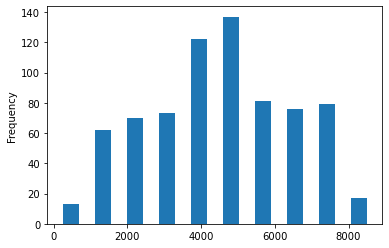

In [6]:
bike['cnt'].plot.hist(rwidth=0.5)

In [7]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [9]:
pd.options.display.max_columns=100

In [10]:
import datetime 

In [11]:
bike['dteday']=pd.to_datetime(bike['dteday'] , format='%d-%m-%Y')

In [12]:
bike['day']=bike['dteday'].dt.day.astype('int64')

In [13]:
bike=bike.drop(['dteday','instant','casual','registered','day'] , axis =1)

- anlalysis of categorical variables
    - which are 
    - weahtersit
    - season
    - mnth
    - weekday
    - holiday

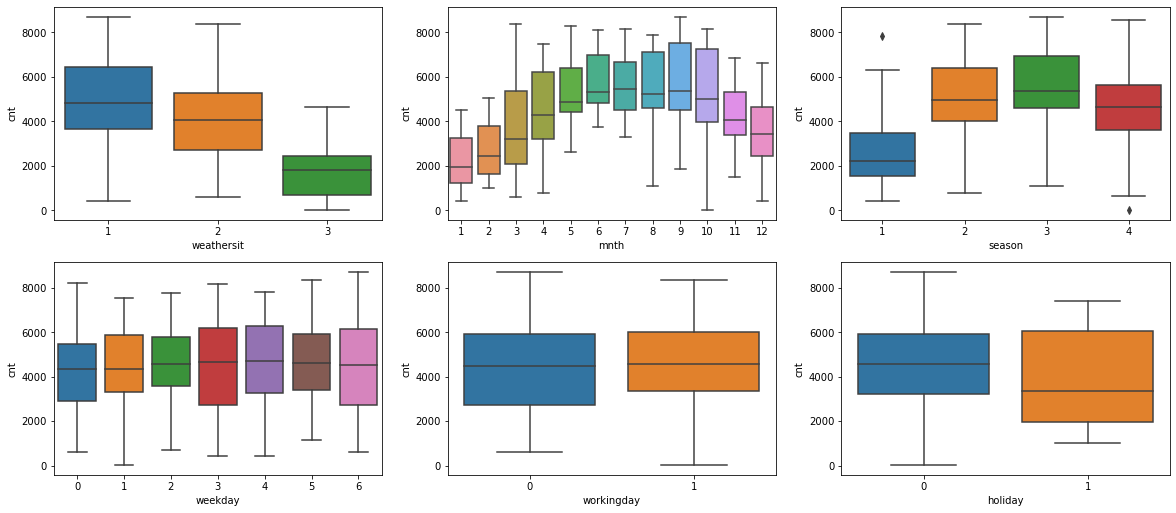

In [14]:
plt.figure(figsize=(20,18))
plt.subplot(4,3,1)
sns.boxplot(x='weathersit',y='cnt' ,data=  bike)
plt.subplot(4,3,2)
sns.boxplot(x='mnth',y='cnt', data= bike )
plt.subplot(4,3,3)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(4,3,4)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(4,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

In [16]:
bike_new = pd.get_dummies( bike, columns= ['mnth','weathersit','season','weekday'], 
                                    drop_first=True ,
                                    prefix=['mnth','weathersit','season','weekday'] )

### Visualising the Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

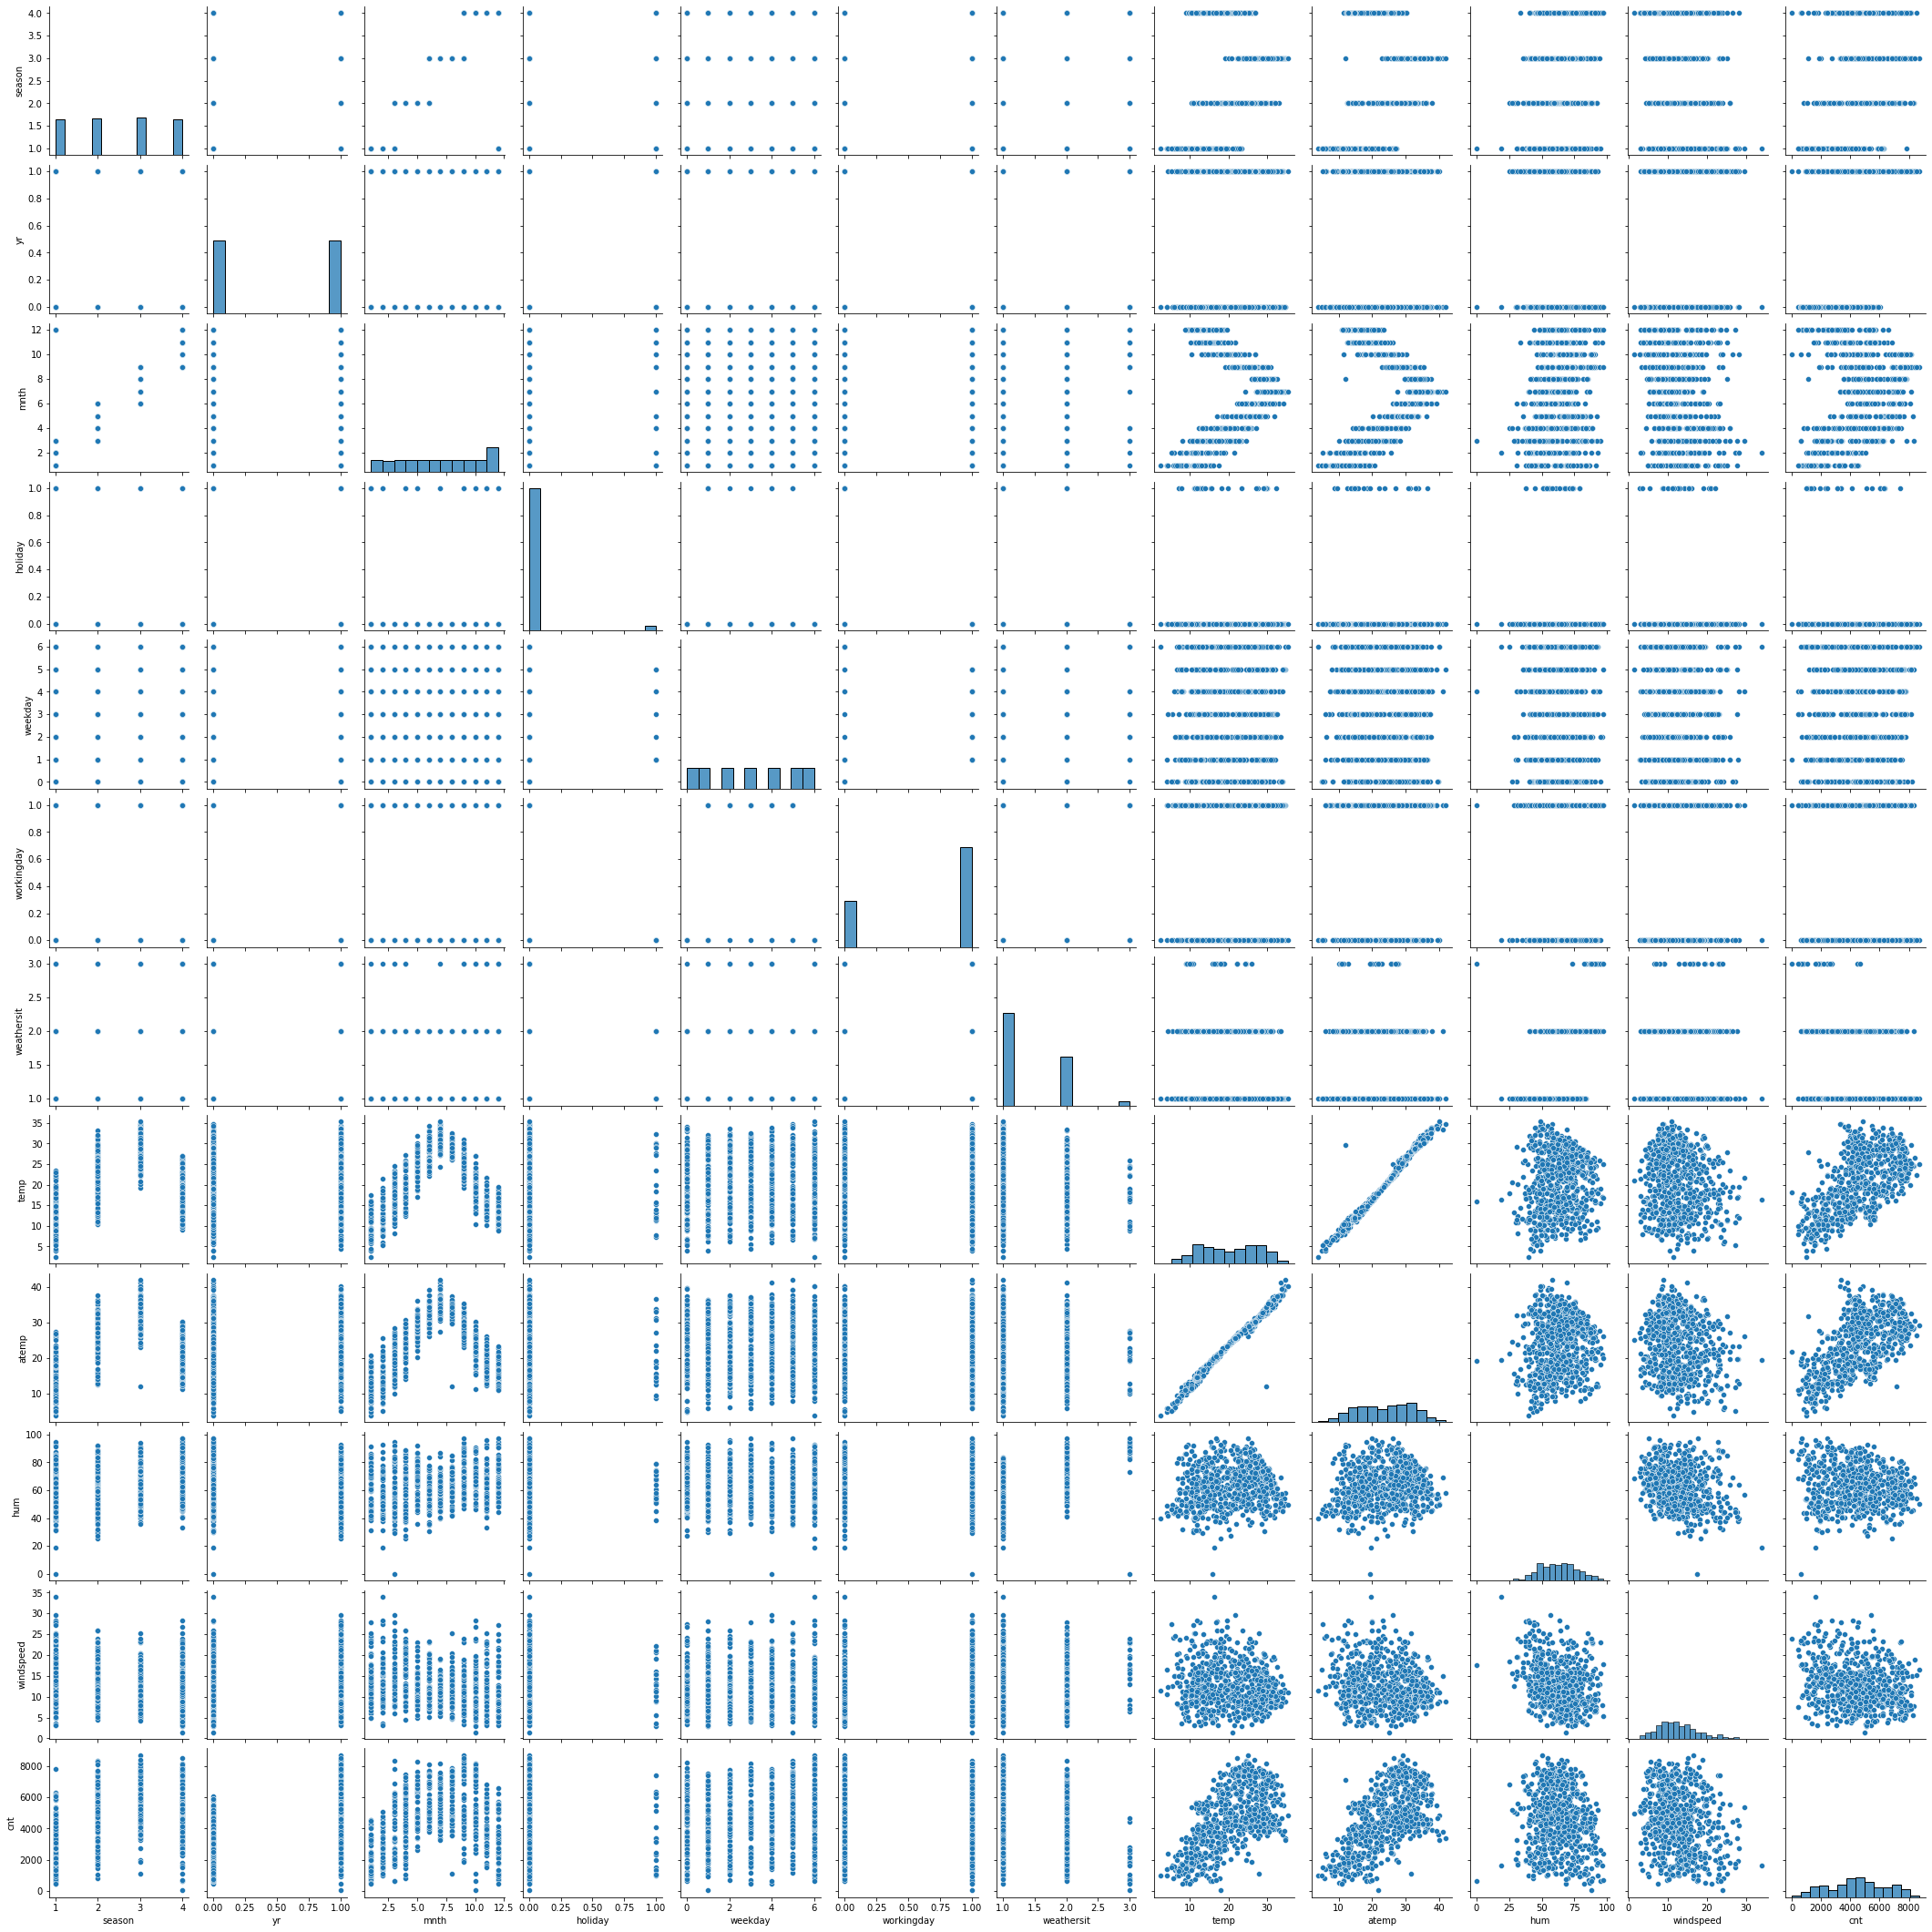

In [88]:
sns.pairplot(bike)
plt.show()

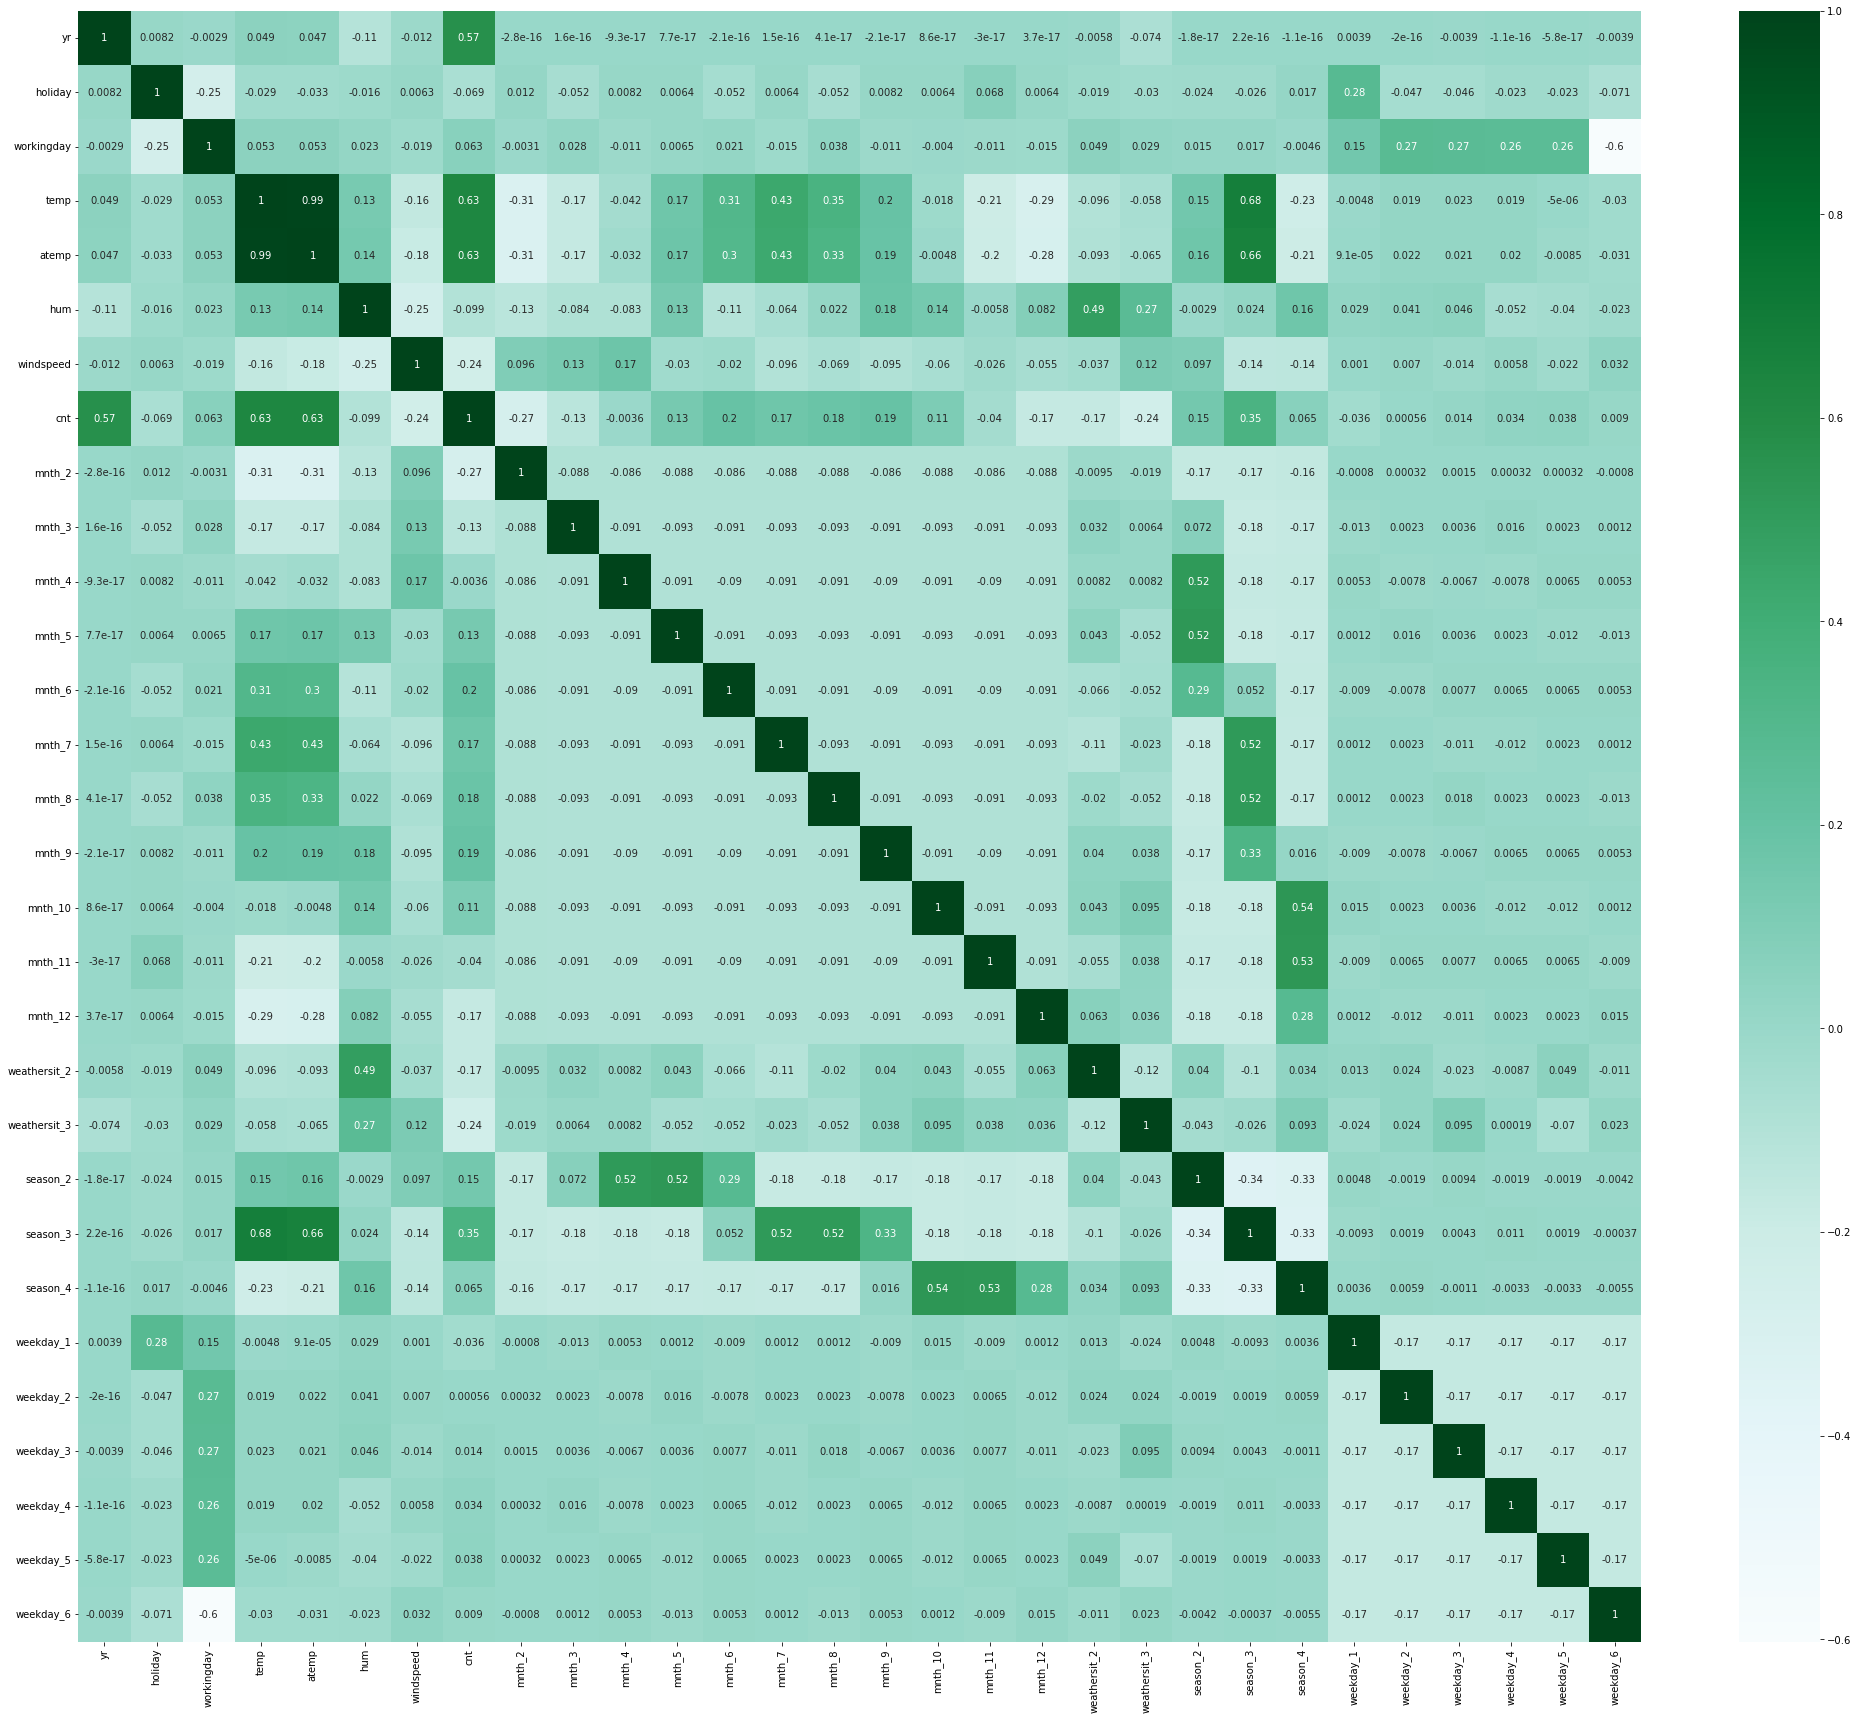

In [17]:
plt.figure(figsize=(35,30))
sns.heatmap(bike_new.corr(),annot=True,cmap='BuGn')
plt.show()

In [18]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   mnth_2        730 non-null    uint8  
 9   mnth_3        730 non-null    uint8  
 10  mnth_4        730 non-null    uint8  
 11  mnth_5        730 non-null    uint8  
 12  mnth_6        730 non-null    uint8  
 13  mnth_7        730 non-null    uint8  
 14  mnth_8        730 non-null    uint8  
 15  mnth_9        730 non-null    uint8  
 16  mnth_10       730 non-null    uint8  
 17  mnth_11       730 non-null    uint8  
 18  mnth_12       730 non-null    

In [19]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   mnth_2        730 non-null    uint8  
 9   mnth_3        730 non-null    uint8  
 10  mnth_4        730 non-null    uint8  
 11  mnth_5        730 non-null    uint8  
 12  mnth_6        730 non-null    uint8  
 13  mnth_7        730 non-null    uint8  
 14  mnth_8        730 non-null    uint8  
 15  mnth_9        730 non-null    uint8  
 16  mnth_10       730 non-null    uint8  
 17  mnth_11       730 non-null    uint8  
 18  mnth_12       730 non-null    

## Splitting the data set into train and test set

In [20]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_train , bike_test = train_test_split(bike_new , train_size=0.7 ,random_state=100)

In [21]:
print (bike_train.shape)
print (bike_test.shape)

(510, 30)
(220, 30)


# Rescaling the train data set
  - Most of the values are not between 0 and 1 and we need these values between 0 and 1 so that we could optimally compare
    the features of the model ex - temp , actual temperature , humidity , windspeed

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
numerics=['temp', 'atemp', 'hum', 'windspeed','cnt']

In [24]:
bike_train[numerics]=scaler.fit_transform(bike_train[numerics])

In [25]:
bike_train[numerics].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the X and y in train data set

In [26]:
y_train=bike_train.pop('cnt')

In [27]:
X_train= bike_train

In [28]:
X_train.shape

(510, 29)

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3', 'season_2',
       'season_3', 'season_4', 'weekday_6'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [34]:
X_train_rfe = X_train[col]

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [37]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          5.17e-191
Time:                        23:29:03   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790   

In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.48
13,season_3,6.04
4,temp,3.71
12,season_2,2.61
14,season_4,2.16
5,hum,1.91
3,workingday,1.88
15,weekday_6,1.79
7,mnth_8,1.68
10,weathersit_2,1.57


In [39]:
X_train_new = X_train_rfe.drop(["season_3"], axis = 1)

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [41]:
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [42]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          8.70e-192
Time:                        23:29:03   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.87
14,weekday_6,1.79
13,season_4,1.71
4,temp,1.59
10,weathersit_2,1.56
9,mnth_10,1.49
7,mnth_8,1.46
12,season_2,1.38


In [44]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          4.92e-192
Time:                        23:29:03   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1850      0.028      6.497   

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.04
4,hum,1.87
12,season_4,1.71
2,workingday,1.66
13,weekday_6,1.65
3,temp,1.59
9,weathersit_2,1.56
8,mnth_10,1.48
6,mnth_8,1.46
11,season_2,1.38


In [46]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          4.37e-192
Time:                        23:29:03   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1780      0.028      6.260   

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.44
4,hum,1.87
2,workingday,1.65
12,weekday_6,1.65
8,weathersit_2,1.56
3,temp,1.54
6,mnth_8,1.44
10,season_2,1.37
11,season_4,1.32
9,weathersit_3,1.24


In [48]:
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          5.10e-191
Time:                        23:29:03   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1705      0.029      5.960   

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.11
4,hum,1.87
2,workingday,1.65
11,weekday_6,1.64
7,weathersit_2,1.56
3,temp,1.27
10,season_4,1.25
8,weathersit_3,1.24
9,season_2,1.19
5,windspeed,1.18


In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.11
4,hum,1.87
2,workingday,1.65
11,weekday_6,1.64
7,weathersit_2,1.56
3,temp,1.27
10,season_4,1.25
8,weathersit_3,1.24
9,season_2,1.19
5,windspeed,1.18


In [69]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
6,weathersit_2,2.10
0,yr,2.02
10,weekday_6,1.79
9,season_4,1.66
8,season_2,1.58
5,mnth_9,1.20


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
y_train_cnt = lm5.predict(X_train_lm5)

In [73]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

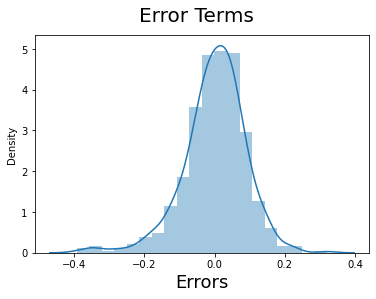

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
6,weathersit_2,2.10
0,yr,2.02
10,weekday_6,1.79
9,season_4,1.66
8,season_2,1.58
5,mnth_9,1.20


## Making Predictions

#### Applying the scaling on the test sets

In [76]:
bike_test.tail()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [77]:
bike_test[numerics] = scaler.transform(bike_test[numerics])

KeyError: "['cnt'] not in index"

#### Dividing into X_test and y_test

In [78]:
bike_test_backup=bike_test

In [83]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_9',
       'weathersit_2', 'weathersit_3', 'season_2', 'season_4', 'weekday_6'],
      dtype='object')

In [80]:
y_test = bike_test.pop('cnt')
X_test = bike_test

KeyError: 'cnt'

In [81]:
X_test_new = X_test[X_train_new.columns]

In [84]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [85]:
# Making predictions
y_pred = lm5.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

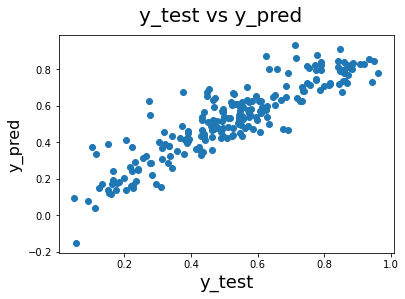

In [86]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8065788803408082